In [18]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [19]:
weather_dataset1 = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2015_1day.csv', index_col=[0], parse_dates=[0], skipinitialspace=True)
# weather_dataset1 = weather_dataset1[:35040]
weather_dataset2 = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2016_1day.csv', index_col=[0], parse_dates=[0], skipinitialspace=True)
weather_dataset3 = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2017_1day.csv', index_col=[0], parse_dates=[0], skipinitialspace=True)
weather_dataset = []
weather_dataset.append(weather_dataset1)
weather_dataset.append(weather_dataset2)
weather_dataset.append(weather_dataset3)
weather_dataset = pd.concat(weather_dataset)
weather_dataset

# weather_dataset = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2017.csv', index_col=['datetime'], parse_dates=['datetime'], skipinitialspace=True)
# weather_dataset = weather_dataset[:35040]

# Remove unused columms
cols_to_remove = [1,2,4,12,14,16,17,20]
weather_dataset.drop(weather_dataset.columns[[cols_to_remove]], axis=1, inplace=True)

# Reorder dataset
weather_dataset = weather_dataset[['precipMM', 'tempC', 'windspeedKmph', 'cond', 'humidity', 'visibility', 'pressure', 'cloudcover', 'heatIndexC', 'dewPointC', 'windChillC', 'windGustKmph', 'feelsLikeC']]
weather_dataset

,precipMM,tempC,windspeedKmph,cond,humidity,visibility,pressure,cloudcover,heatIndexC,dewPointC,windChillC,windGustKmph,feelsLikeC
2015-01-01,0.020649,0.232552,0.350260,0.565789,0.810009,0.968750,0.775503,0.333906,0.268139,0.569311,0.236719,0.285807,0.268139
2015-01-02,0.000000,0.231250,0.441406,0.585526,0.765097,1.000000,0.848240,0.308802,0.247126,0.504407,0.231250,0.334925,0.247126
2015-01-03,0.001106,0.241667,0.305398,0.631579,0.808877,1.000000,0.826509,0.484427,0.278736,0.570513,0.241667,0.227720,0.278736
2015-01-04,0.000369,0.278385,0.205374,0.580044,0.838240,1.000000,0.762392,0.418542,0.331897,0.612179,0.278385,0.173394,0.327586
2015-01-05,0.001106,0.323698,0.177083,0.399123,0.842995,0.848307,0.742816,0.361146,0.390805,0.685897,0.323698,0.150246,0.390805
2015-01-06,0.001106,0.357813,0.160393,0.399123,0.806914,0.771484,0.739943,0.280833,0.414511,0.662260,0.357813,0.136212,0.414511
2015-01-07,0.001659,0.270573,0.180279,0.414474,0.822992,0.869792,0.759698,0.317708,0.322557,0.612179,0.270573,0.144893,0.322557
2015-01-08,0.000000,0.222917,0.320786,0.645833,0.738074,1.000000,0.832435,0.260417,0.243714,0.450721,0.222917,0.264395,0.243714
2015-01-09,0.004978,0.185417,0.312263,0.559211,0.800121,0.921875,0.860632,0.545833,0.216415,0.483974,0.185417,0.245732,0.216415
2015-01-10,0.000369,0.183854,0.310133,0.655702,0.721014,1.000000,0.844828,0.332656,0.202586,0.380208,0.183854,0.256510,0.183728


# Correlate

In [20]:
new_dataset = weather_dataset.copy()
for i in range(1, 6):
    new_dataset.precipMM = new_dataset.precipMM.shift(-1)
    new_dataset = new_dataset[:(len(new_dataset)-1)]
    corr = new_dataset.corr(method='spearman')
    corr.to_csv('wwo_correlated_manila/corr_weather_1day_lag' + str(i) + '.csv')

In [21]:
# Correlate
corr = weather_dataset.corr(method='spearman')

# rename columns
cols = string.ascii_uppercase
cols = cols[:len(corr)]
cols = list(cols)
corr.columns = cols
corr = np.round(corr, decimals=4)
corr

,A,B,C,D,E,F,G,H,I,J,K,L,M
precipMM,1.0000,0.1076,-0.2937,0.3649,0.4599,-0.4796,-0.4611,0.6231,0.3264,0.6297,0.1077,-0.2003,0.3464
tempC,0.1076,1.0000,-0.6163,0.1613,-0.5183,-0.0800,-0.2208,-0.3414,0.9016,0.4682,1.0000,-0.6495,0.9237
windspeedKmph,-0.2937,-0.6163,1.0000,-0.2803,0.0533,0.0385,0.0860,0.0473,-0.6932,-0.4883,-0.6165,0.9826,-0.6761
cond,0.3649,0.1613,-0.2803,1.0000,0.1113,-0.2612,-0.2225,0.2266,0.2328,0.2982,0.1614,-0.2412,0.2443
humidity,0.4599,-0.5183,0.0533,0.1113,1.0000,-0.0074,-0.0729,0.5367,-0.1697,0.3935,-0.5181,0.1307,-0.2201
visibility,-0.4796,-0.0800,0.0385,-0.2612,-0.0074,1.0000,0.7025,-0.3259,-0.0055,-0.3545,-0.0801,-0.0266,-0.0962
pressure,-0.4611,-0.2208,0.0860,-0.2225,-0.0729,0.7025,1.0000,-0.3394,-0.1875,-0.4476,-0.2209,0.0624,-0.3147
cloudcover,0.6231,-0.3414,0.0473,0.2266,0.5367,-0.3259,-0.3394,1.0000,-0.1762,0.2320,-0.3411,0.1285,-0.1522
heatIndexC,0.3264,0.9016,-0.6932,0.2328,-0.1697,-0.0055,-0.1875,-0.1762,1.0000,0.7166,0.9017,-0.6942,0.9720
dewPointC,0.6297,0.4682,-0.4883,0.2982,0.3935,-0.3545,-0.4476,0.2320,0.7166,1.0000,0.4684,-0.4236,0.6772


In [22]:
corr.to_csv('wwo_correlated_manila\corr_weather_1day.csv')

## Graph Correlation

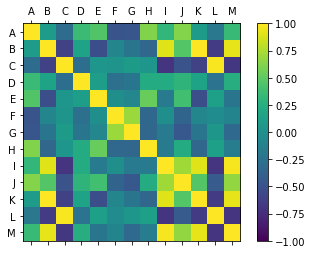

In [23]:
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(cols)
ax.set_yticklabels(cols)
plt.savefig('corr_weather_1day_matrix.png')
plt.show()

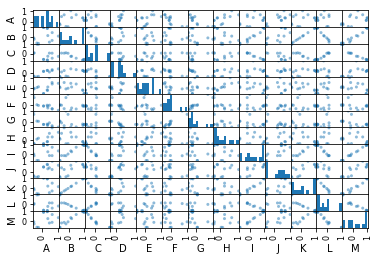

In [24]:
plt.figure(figsize=(500,300))
scatter_matrix(corr)
plt.savefig('corr_weather_1day_scatterplot.png')
plt.show()